# Notebook for EDA-Project "King County House Prices"

Author: Sebastian Fuhrer, sebastian.fuhrer@hotmail.com

In [68]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats, linalg
import folium 
from folium import plugins
import statsmodels.api as sms
import statsmodels.formula.api as smf
import math
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
plt.style.use('seaborn')

## Variable description 

| Variable | Description 
|:-------------|:-----------------------------------------------------------------------------
| Id           | Unique ID for each home sold                                                  
| Date         | Date of the home sale                                                        
| Price        | Price of each home sold                                                       
| Bedroom      | Number of bedrooms  
| Bathrooms    | Number of bathrooms, where .5 accounts for a room with a toilet but no shower
| Sqft_living  | Square footage of the apartments interior space                                
| Sqft_lot     | Square footage of the land space                                              
| Floors       | Number of floors
| Waterfront   | A dummy variable for whether the apartment was overlooking the waterfront or  not
| View         | An index from 0 to 4 of how good the view of the property was
| Condition    | An index from 1 to 5 on the condition of the apartment
| Grade        | An index from 3 to 13, where 3-6 falls short of building construction and      design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
| Sqft_above   | The square footage of the interior housing space that is above ground level
| Sqft_basement| The square footage of the interior housing space that is below ground level
| Yr_built     | The year the house was initially built
| Yr_renovated | The year of the houses´s last renovation
| Zipcode      | What zipcode area the house is in
| Lat          | Lattitude
| Long         | Longitude
| Sqft_living15| The square footage of interior housing living space for the nearest 15 neighbors
| Sqft_lot15   | The square footage of the land lots of the nearest 15 neighbors




In [69]:
kc_df = pd.read_csv('hh-2020-ds1-Project-EDA-master/King_County_House_prices_dataset.csv')
kc_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data cleaning

### Sqft_basement from string to float and get rid of the question mark

sqft_basement is a series with type 'str' and also some values of this series are '?'.
So we replace all '?' with '0.0' and change the type 'str' to type 'float64'.

In [70]:
type(kc_df.sqft_basement[6])

str

In [71]:
kc_df.sqft_basement = kc_df.sqft_basement.str.replace('?','0').astype(float)

### Date column is not realy helpful

In [72]:
kc_df = kc_df.drop('date',axis=1)

## Data Exploration

### Type of data and missings

In [73]:
# To get a closer look at the data
print('Number of rows and columns of house_prices_df: ',kc_df.shape)
kc_df.head()

Number of rows and columns of house_prices_df:  (21597, 20)


id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0         NaN   0.0          3      7        1180            0.0      1955   
1         0.0   0.0          3      7        2170          400.0      1951   
2         0.0   0.0          3      6         770            0.0      1933   
3         0.0   0.0          5      7        1050          910.0      1965   
4         0.0   0.0          3      8        1680            0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           NaN    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503

In [74]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11)
memory usage: 3.3 MB


In [75]:
missing = pd.DataFrame(kc_df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/kc_df.shape[0]*100,1)
missing[missing.Number!=0]


Number  Percentage
waterfront      2376        11.0
view              63         0.3
yr_renovated    3842        17.8

Of the 21 variables 3 have missing values.
- **waterfront** has no values for 11.0 percent of instances
- **view** has only 63 instances or 0.3 percent missing values
- **yr_renovated** is not known in 17.8 percent of all cases

### Basic statistics

In [76]:
kc_df.describe().round(2)

id       price  bedrooms  bathrooms  sqft_living    sqft_lot  \
count  2.159700e+04    21597.00  21597.00   21597.00     21597.00    21597.00   
mean   4.580474e+09   540296.57      3.37       2.12      2080.32    15099.41   
std    2.876736e+09   367368.14      0.93       0.77       918.11    41412.64   
min    1.000102e+06    78000.00      1.00       0.50       370.00      520.00   
25%    2.123049e+09   322000.00      3.00       1.75      1430.00     5040.00   
50%    3.904930e+09   450000.00      3.00       2.25      1910.00     7618.00   
75%    7.308900e+09   645000.00      4.00       2.50      2550.00    10685.00   
max    9.900000e+09  7700000.00     33.00       8.00     13540.00  1651359.00   

         floors  waterfront      view  condition     grade  sqft_above  \
count  21597.00    19221.00  21534.00   21597.00  21597.00    21597.00   
mean       1.49        0.01      0.23       3.41      7.66     1788.60   
std        0.54        0.09      0.77       0.65      1.17      827.76   
min        1.00        0.00      0.00       1.00      3.00      370.00   
25%        1.00        0.00      0.00       3.00      7.00     1190.00   
50%        1.50        0.00      0.00       3.00      7.00     1560.00   
75%        2.00        0.00      0.00       4.00      8.00     2210.00   
max        3.50        1.00      4.00       5.00     13.00     9410.00   

       sqft_basement  yr_built  yr_renovated   zipcode       lat      long  \
count       21597.00  21597.00      17755.00  21597.00  21597.00  21597.00   
mean          285.72   1971.00         83.64  98077.95     47.56   -122.21   
std           439.82     29.38        399.95     53.51      0.14      0.14   
min             0.00   1900.00          0.00  98001.00     47.16   -122.52   
25%             0.00   1951.00          0.00  98033.00     47.47   -122.33   
50%             0.00   1975.00          0.00  98065.00     47.57   -122.23   
75%           550.00   1997.00          0.00  98118.00     47.68   -122.12   
max          4820.00   2015.00       2015.00  98199.00     47.78   -121.32   

       sqft_living15  sqft_lot15  
count       21597.00    21597.00  
mean         1986.62    12758.28  
std           685.23    27274.44  
min           399.00      651.00  
25%          1490.00     5100.00  
50%          1840.00     7620.00  
75%          2360.00    10083.00  
max          6210.00   871200.00

### Correlation analyis

$r_{x,y} = \frac{\Sigma_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\Sigma_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\Sigma_{i=1}^{n}(y_i-\bar{y})^2}}=\frac{Cov(x,y)}{Std(x)\times Std(y)}$

In [77]:
continuous_var = list(kc_df.select_dtypes(
                            ['int64','float64']).columns.values)
continuous_var.remove('id')
categorical_var = ['date']
continuous_var

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

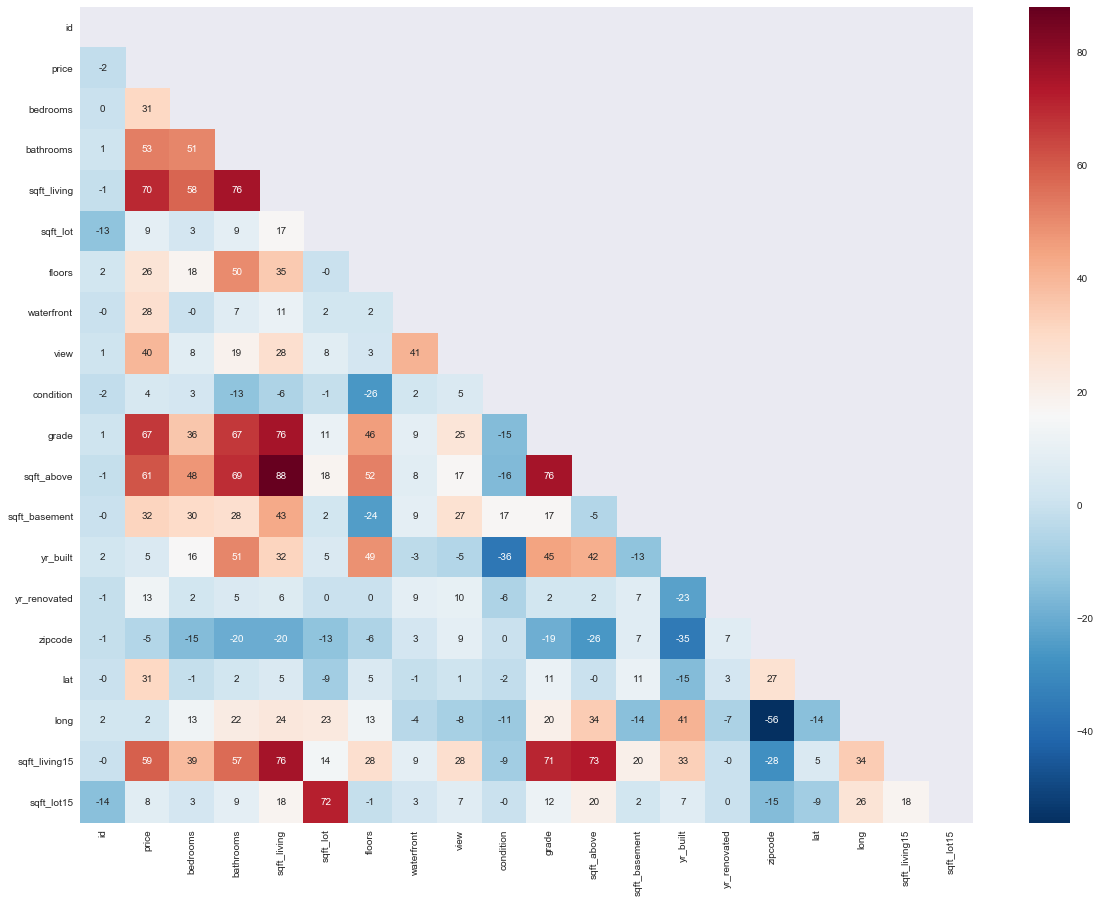

In [79]:
mask = np.triu(kc_df.corr())
plt.figure(figsize = (20,15))
ax = sns.heatmap(round(kc_df.corr()*100)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r')

Through the red and blue colored squares, we can easily see that 'sqft_living', 'sqft_above' and 'grade' are highly linear correlated with the 'price' lable.

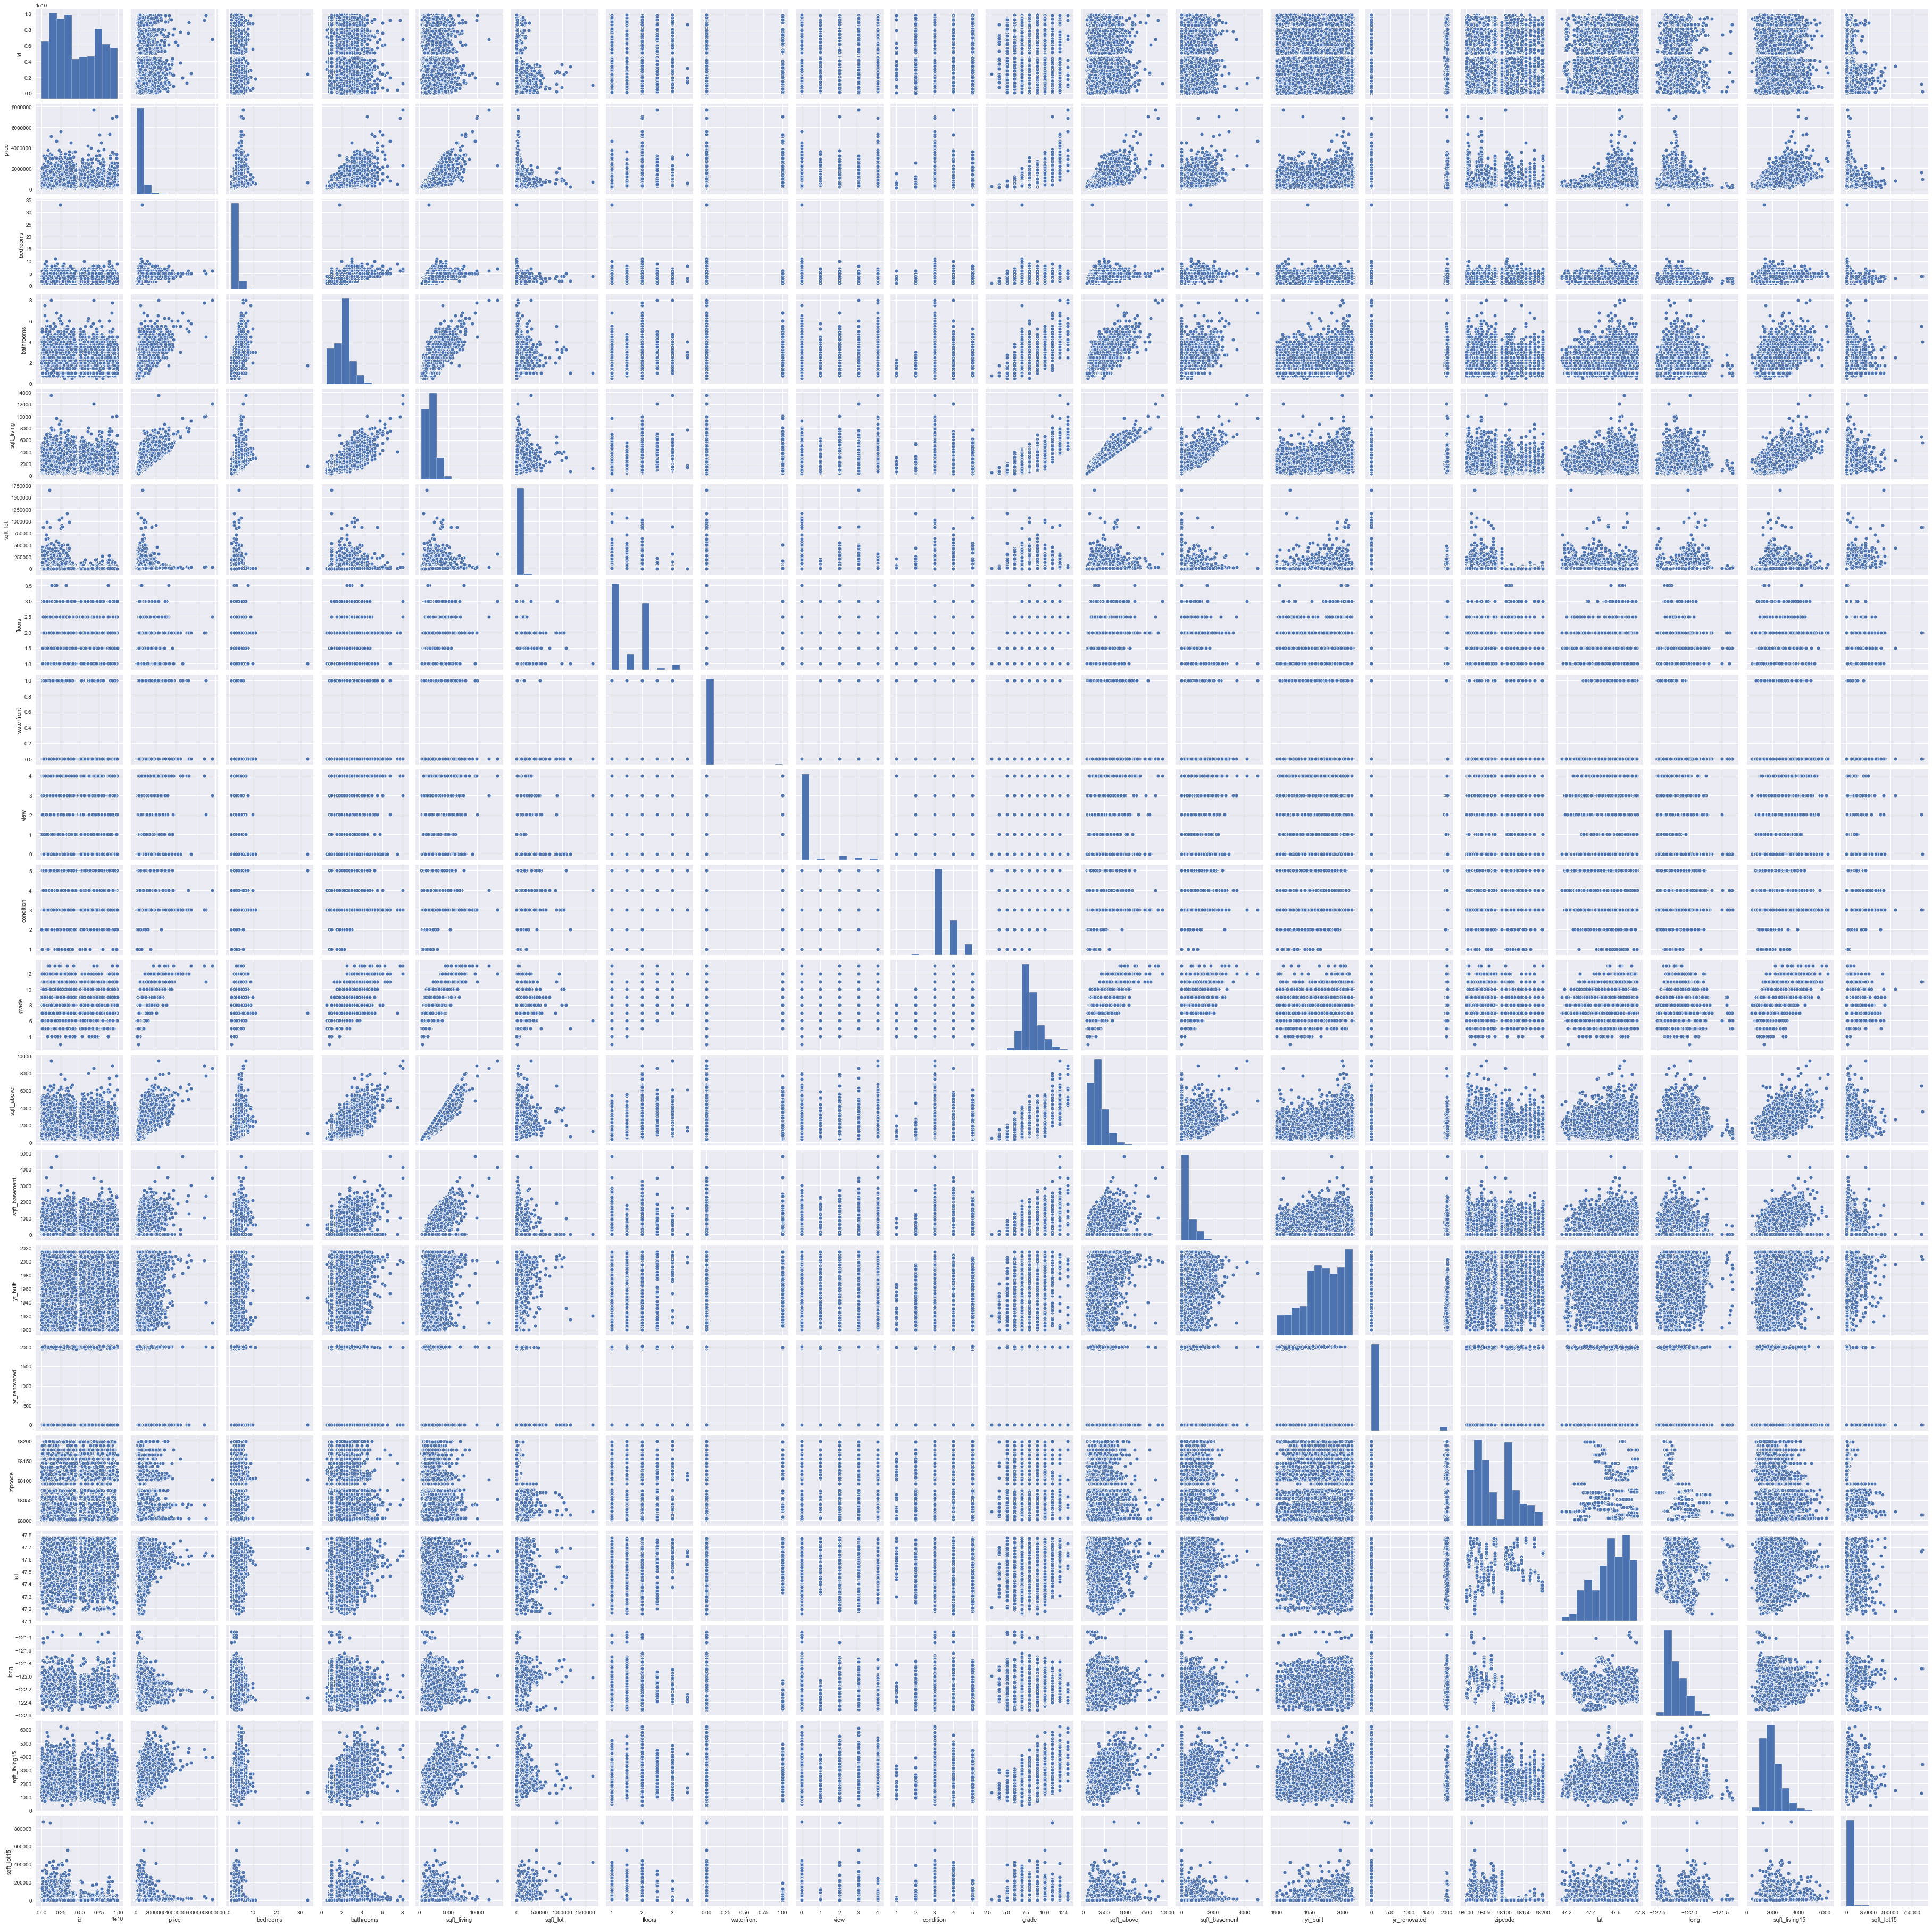

In [80]:
X = sns.pairplot(kc_df);

### Histograms

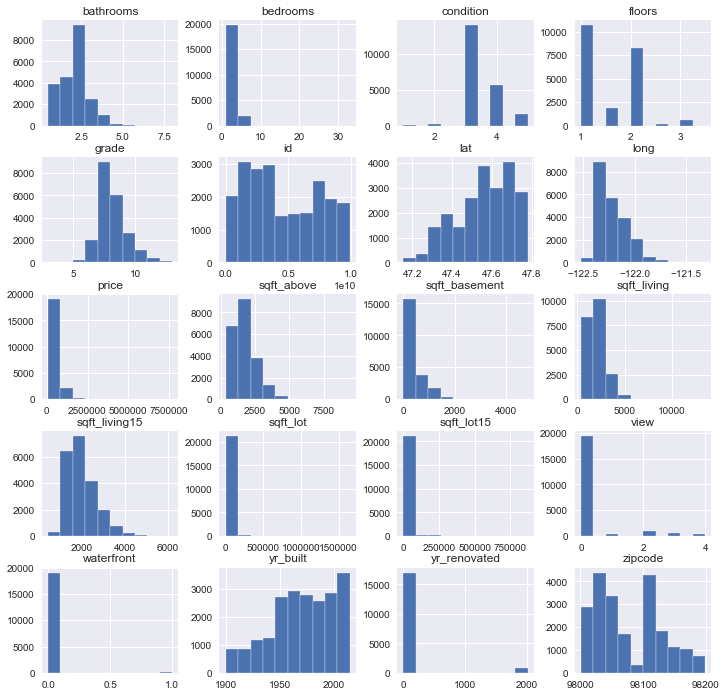

In [81]:
Z = kc_df.hist(figsize=(12,12))

## Feature Engineering

### Scatterplots

Through visualization i try to identify house features that affect the price variable and could be potential predictors. The correlation coefficient indicates the extent to which two features are more linearly dependent on one another. Since the features 'sqft_living', 'grade' and 'sqft_above' have a high correlation coefficient, i visualize them in a scatter plot.

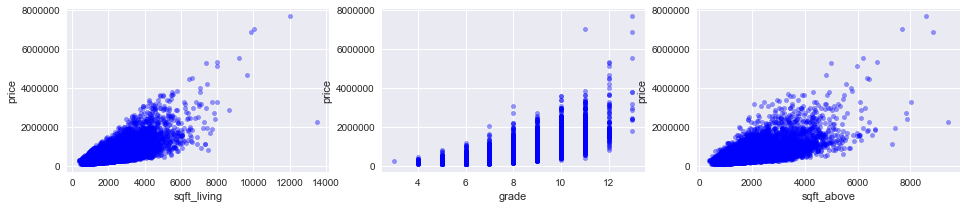

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'grade', 'sqft_above'], axes):
    kc_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Now we look at the associated regression line

In [86]:
X = kc_df[['sqft_living']]
X = sms.add_constant(X)
X.head()

const  sqft_living
0    1.0         1180
1    1.0         2570
2    1.0          770
3    1.0         1960
4    1.0         1680

In [87]:
y = kc_df.price
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [88]:
# Create a OLS model
model = sms.OLS(y,X)
results = model.fit()

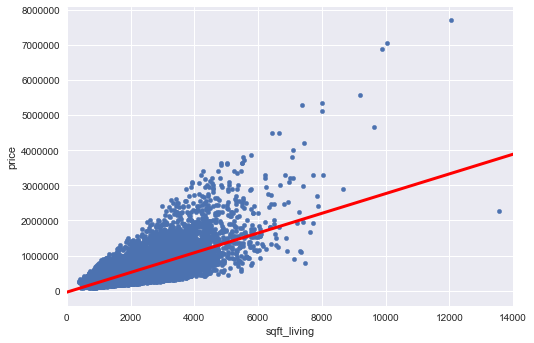

In [89]:
intercept, slope = results.params
ax = kc_df.plot('sqft_living', 'price', kind='scatter')
xx = np.linspace(0, 14000, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([0,14000]);

In [90]:
X_1 = kc_df[['grade']]
X_1 = sms.add_constant(X_1)
X_1.head()

const  grade
0    1.0      7
1    1.0      7
2    1.0      6
3    1.0      7
4    1.0      8

In [91]:
model = sms.OLS(y,X_1)
results = model.fit()

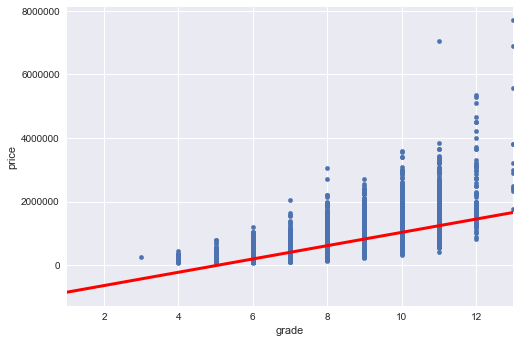

In [92]:
intercept, slope = results.params
ax = kc_df.plot('grade', 'price', kind='scatter')
xx = np.linspace(1, 13, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([1,13]);

In [94]:
X_2 = kc_df[['sqft_above']]
X_2 = sms.add_constant(X_2)
X_2.head()

const  sqft_above
0    1.0        1180
1    1.0        2170
2    1.0         770
3    1.0        1050
4    1.0        1680

In [95]:
model = sms.OLS(y,X_2)
results = model.fit()

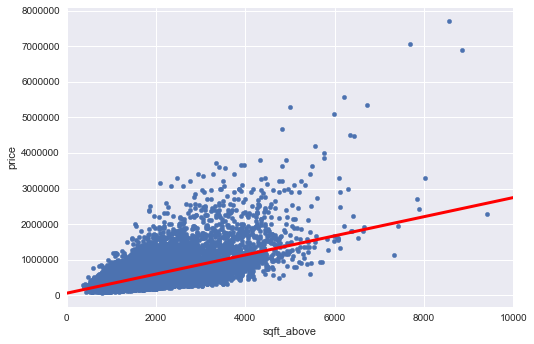

In [96]:
intercept, slope = results.params
ax = kc_df.plot('sqft_above', 'price', kind='scatter')
xx = np.linspace(0, 10000, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([0,10000]);

## Deeper look into the data

### Is the location (Latitude and Longitude) important for housing price ?

We scale the house price with the log function, then have big outlier points not so much influence.

In [98]:
kc_df['log_price'] = [math.log(float(p)) for p in kc_df.price]

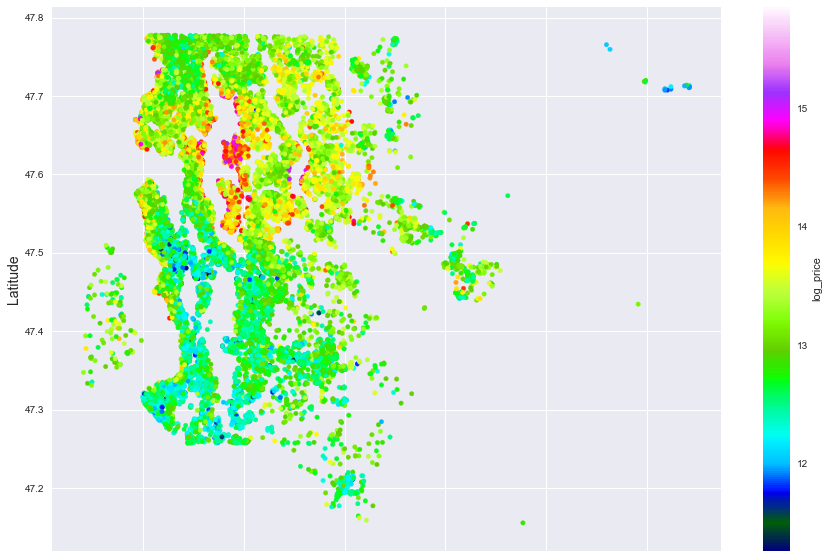

In [102]:
kc_df.plot(kind='scatter', x='long', y='lat', c='log_price',
             cmap=plt.get_cmap('gist_ncar'),colorbar=True,
             alpha=1,figsize=(15, 10))
#Labels
plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.show()

The red points are mostly Seattle and surroundings of Seattle. From this we can derive a connection between location and price.

## Does a basement increase the price of a house ?

First we sort the 'sqft_baement' column and then we have a look at the mean and median of houses with and without basement.

In [104]:
kc_df.sqft_basement.sort_values().tail()

10074    3260.0
7245     3480.0
15468    3500.0
12764    4130.0
8085     4820.0
Name: sqft_basement, dtype: float64

In [105]:
kc_basement = kc_df.query('sqft_basement > 0')
kc_basement.head()

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1   6414100192   538000.0         3       2.25         2570      7242     2.0   
3   2487200875   604000.0         4       3.00         1960      5000     1.0   
5   7237550310  1230000.0         4       4.50         5420    101930     1.0   
8   2414600126   229500.0         3       1.00         1780      7470     1.0   
10  1736800520   662500.0         3       2.50         3560      9796     1.0   

    waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
1          0.0   0.0          3      7        2170          400.0      1951   
3          0.0   0.0          5      7        1050          910.0      1965   
5          0.0   0.0          3     11        3890         1530.0      2001   
8          0.0   0.0          3      7        1050          730.0      1960   
10         NaN   0.0          3      8        1860         1700.0      1965   

    yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
1         1991.0    98125  47.7210 -122.319           1690        7639   
3            0.0    98136  47.5208 -122.393           1360        5000   
5            0.0    98053  47.6561 -122.005           4760      101930   
8            0.0    98146  47.5123 -122.337           1780        8113   
10           0.0    98007  47.6007 -122.145           2210        8925   

    log_price  
1   13.195614  
3   13.311329  
5   14.022525  
8   12.343658  
10  13.403776

In [108]:
kc_without_b = kc_df.query('sqft_basement == 0')
kc_without_b.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   
6  1321400060  257500.0         3       2.25         1715      6819     2.0   
7  2008000270  291850.0         3       1.50         1060      9711     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0         NaN   0.0          3      7        1180            0.0      1955   
2         0.0   0.0          3      6         770            0.0      1933   
4         0.0   0.0          3      8        1680            0.0      1987   
6         0.0   0.0          3      7        1715            0.0      1995   
7         0.0   NaN          3      7        1060            0.0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0           0.0    98178  47.5112 -122.257           1340        5650   
2           NaN    98028  47.7379 -122.233           2720        8062   
4           0.0    98074  47.6168 -122.045           1800        7503   
6           0.0    98003  47.3097 -122.327           2238        6819   
7           0.0    98198  47.4095 -122.315           1650        9711   

   log_price  
0  12.309982  
2  12.100712  
4  13.142166  
6  12.458775  
7  12.583995

In [114]:
withb = kc_basement.price.mean()
withb

623046.8774798606

In [116]:
withoutb = kc_without_b.price.mean()
withoutb

488471.7031626506

In [107]:
kc_basement.price.median()

515000.0

In [110]:
kc_without_b.price.median()

415000.0

In [134]:
description = ['mean_with_basement', 'mean_without_basement', 'median_with_basement', 'median_without_basement']
values = [623046.8774798606, 488471.7031626506, 515000.0, 415000.0]

sf = list(zip(description, values))

df_sf = pd.DataFrame(data=sf,
                    columns=['description', 'values'])

df_sf

description         values
0       mean_with_basement  623046.877480
1    mean_without_basement  488471.703163
2     median_with_basement  515000.000000
3  median_without_basement  415000.000000

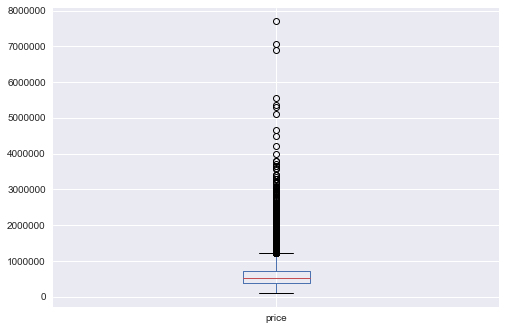

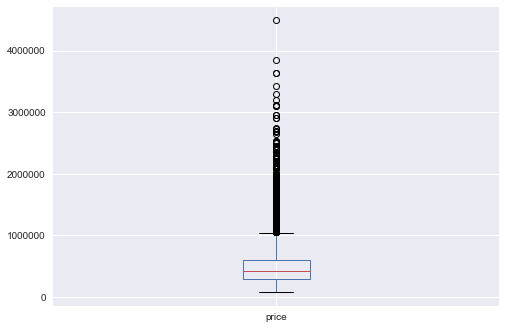

In [135]:
kc_basement[['price']].plot(kind='box')
kc_without_b[['price']].plot(kind='box')

There is an effect, if the house has a basement then it is in average 100.000$ more worth

# Multivariate linear regression

## Independet variables

In [136]:
independent_vars = list(kc_df.columns)
independent_vars = [i for i in independent_vars
                       if i not in ('id')]
independent_vars

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'log_price']

## R squared

In [137]:
print('R squared for each possible independent variable:' )
for independent_var in independent_vars:
    model = 'price ~ {:}'.format(independent_var)
    rs = smf.ols(formula=model, data=kc_df).fit().rsquared
    print('{:7s} \t \t= {:.3}'.format(independent_var, rs))
    

R squared for each possible independent variable:
price   	 	= 1.0
bedrooms 	 	= 0.0953
bathrooms 	 	= 0.277
sqft_living 	 	= 0.493
sqft_lot 	 	= 0.00808
floors  	 	= 0.0659
waterfront 	 	= 0.0763
view    	 	= 0.157
condition 	 	= 0.0013
grade   	 	= 0.446
sqft_above 	 	= 0.366
sqft_basement 	 	= 0.103
yr_built 	 	= 0.00291
yr_renovated 	 	= 0.0168
zipcode 	 	= 0.00285
lat     	 	= 0.0941
long    	 	= 0.000486
sqft_living15 	 	= 0.343
sqft_lot15 	 	= 0.00686
log_price 	 	= 0.795


## Ordinary least squares 

### OLS with all independent variables

In [139]:
smf.ols(formula='log_price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + sqft_basement', data=kc_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     2956.
Date:                Sun, 14 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:21:58   Log-Likelihood:                -605.65
No. Observations:               15762   AIC:                             1249.
Df Residuals:                   15743   BIC:                             1395.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.2038      4.299     -1.676      0.094     -15.631       1.223
bedrooms         -0.0122      0.003     -4.444      0.000      -0.018      -0.007
bathrooms         0.0702      0.005     14.706      0.000       0.061       0.080
sqft_living       0.0002   2.66e-05      6.504      0.000       0.000       0.000
sqft_lot       4.485e-07   6.95e-08      6.455      0.000    3.12e-07    5.85e-07
floors            0.0734      0.005     13.913      0.000       0.063       0.084
waterfront        0.3777      0.025     14.874      0.000       0.328       0.428
view              0.0618      0.003     19.573      0.000       0.056       0.068
condition         0.0623      0.003     18.095      0.000       0.056       0.069
grade             0.1568      0.003     49.347      0.000       0.151       0.163
sqft_above    -3.441e-05   2.65e-05     -1.296      0.195   -8.64e-05    1.76e-05
yr_built         -0.0034      0.000    -31.875      0.000      -0.004      -0.003
yr_renovated   3.893e-05    5.4e-06      7.210      0.000    2.83e-05    4.95e-05
zipcode          -0.0006   4.83e-05    -12.665      0.000      -0.001      -0.001
lat               1.4048      0.016     89.529      0.000       1.374       1.436
long             -0.1470      0.019     -7.641      0.000      -0.185      -0.109
sqft_living15  9.662e-05   5.08e-06     19.021      0.000    8.67e-05       0.000
sqft_lot15    -2.312e-07   1.05e-07     -2.211      0.027   -4.36e-07   -2.62e-08
sqft_basement -2.221e-05   2.63e-05     -0.844      0.399   -7.38e-05    2.94e-05
==============================================================================
Omnibus:                      281.579   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              574.435
Skew:                          -0.042   Prob(JB):                    1.83e-125
Kurtosis:                       3.931   Cond. No.                     2.16e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS with choosen variables

In [140]:
smf.ols(formula='log_price ~ sqft_living + grade + sqft_above' , data=kc_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     9322.
Date:                Sun, 14 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:22:06   Log-Likelihood:                -7820.6
No. Observations:               21597   AIC:                         1.565e+04
Df Residuals:                   21593   BIC:                         1.568e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.0806      0.019    583.615      0.000      11.043      11.118
sqft_living     0.0003   5.64e-06     53.520      0.000       0.000       0.000
grade           0.2055      0.003     63.266      0.000       0.199       0.212
sqft_above     -0.0001   6.18e-06    -21.209      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       37.044   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.179
Skew:                           0.101   Prob(JB):                     8.45e-09
Kurtosis:                       3.029   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Result Summary

## What results did we get ?

First of all, we saw a large linear correlation between 'sqft_living', 'grade' and 'sqft_above' to oure 'price' variable. Because the 'sqft_above' is highly correlated with 'sqft_living' we should erase it to avoid multicollinearity. 

We saw that location is an important fact for housing prices. With the latitude and longitude features we could easily see in which area the housing prices are cheap and in which they are more expensive.

Through our EDA analysis, we realized that properties with a basement are on average around $ 100,000 more expensive than properties without a basement.

## Future Work

First i will clean the data a little bit more. 
Then i want to create some new features, which have an affect on the 'price'.
With these new features we maybe get an better explanatory content for the 'price' label. 
To get oure R-squared higher then 0.56. 
